# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [20]:
genome_ids = ['HG00231', 'HG00129', 'HG00251', 'HG00118', 'HG00134', 'HG00100', 'HG00097', 'HG00128', 'HG02215', 'HG00146', 'HG00249', 'HG00256', 'HG00103', 'HG00243', 'HG00157', 'HG01789', 'HG00120', 'HG00139', 'HG00109', 'HG00254', 'HG00250', 'HG00135', 'HG00236', 'HG00126', 'HG00148', 'HG00150', 'HG00160', 'HG00143', 'HG00108', 'HG00155', 'HG00232', 'HG00115', 'HG00142', 'HG00239', 'HG00233', 'HG00113', 'HG00260', 'HG00257', 'HG00158', 'HG00252', 'HG00253', 'HG00114', 'HG00238', 'HG00246', 'HG00117', 'HG00096', 'HG00104', 'HG00262', 'HG00119', 'HG00121', 'HG00133', 'HG00130', 'HG00259', 'HG00140', 'HG00141', 'HG00240', 'HG00123', 'HG00156', 'HG00255', 'HG00263', 'HG00105', 'HG00110', 'HG00235', 'HG01334', 'HG00107', 'HG00131', 'HG00138', 'HG00152', 'HG00245', 'HG00159', 'HG00099', 'HG00264', 'HG00137', 'HG00116', 'HG00122', 'HG00234', 'HG00125', 'HG00111', 'HG00261', 'HG01791', 'HG00101', 'HG00149', 'HG00136', 'HG00244', 'HG01790', 'HG00132', 'HG00102', 'HG00154', 'HG00258', 'HG00106', 'HG00112', 'HG00265', 'HG00151', 'HG00237', 'HG00127', 'HG00145']

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [22]:
root_dir = join(Path.home(),"cp_als/populations")

In [23]:
infile = join(root_dir,"output/GBR/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/GBR/all.csv'

In [24]:
df = pd.read_csv(infile)

In [25]:
df = df[genome_ids + ['gene']]
df.head()

,HG00231,HG00129,HG00251,HG00118,HG00134,HG00100,HG00097,HG00128,HG02215,HG00146,...,HG00154,HG00258,HG00106,HG00112,HG00265,HG00151,HG00237,HG00127,HG00145,gene
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,0,1,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,TARDBP
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,TARDBP
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,TARDBP


## Computer variant count per gene and per genome

In [26]:
sdf=df.groupby(["gene"]).sum()

In [27]:
sdf.head()

,HG00231,HG00129,HG00251,HG00118,HG00134,HG00100,HG00097,HG00128,HG02215,HG00146,...,HG00102,HG00154,HG00258,HG00106,HG00112,HG00265,HG00151,HG00237,HG00127,HG00145
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,17,5,4,34,19,4,8,21,1,2,...,32,3,8,33,4,4,5,36,19,36
ANG,0,0,4,0,9,2,8,5,0,11,...,5,11,5,9,3,0,11,0,5,5
ATXN2,12,15,10,15,9,7,8,9,9,7,...,11,18,9,6,15,8,12,17,14,12
C19ORF12,10,8,8,8,7,9,8,11,9,5,...,20,8,10,10,9,7,8,20,8,8
C9ORF72,34,35,10,45,22,22,10,14,4,28,...,35,29,25,40,10,23,34,35,11,23


## Compute mean99

In [28]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [29]:
mean99.head()

,0
HG00231,12.939394
HG00129,15.656566
HG00251,9.919192
HG00118,12.222222
HG00134,12.191919


In [30]:
m99 = mean99.transpose()

In [31]:
m99

,HG00231,HG00129,HG00251,HG00118,HG00134,HG00100,HG00097,HG00128,HG02215,HG00146,...,HG00102,HG00154,HG00258,HG00106,HG00112,HG00265,HG00151,HG00237,HG00127,HG00145
0,12.939394,15.656566,9.919192,12.222222,12.191919,14.787879,16.171717,10.030303,15.59596,11.070707,...,12.767677,14.434343,9.555556,14.313131,11.20202,13.686869,14.939394,16.454545,15.010101,14.59596


## Name the row "mean99" to append to the dataframe 

In [32]:
m99.index=["mean99"]

In [33]:
m99.head()

,HG00231,HG00129,HG00251,HG00118,HG00134,HG00100,HG00097,HG00128,HG02215,HG00146,...,HG00102,HG00154,HG00258,HG00106,HG00112,HG00265,HG00151,HG00237,HG00127,HG00145
mean99,12.939394,15.656566,9.919192,12.222222,12.191919,14.787879,16.171717,10.030303,15.59596,11.070707,...,12.767677,14.434343,9.555556,14.313131,11.20202,13.686869,14.939394,16.454545,15.010101,14.59596


## Compute statistics per genome, across all genes

In [34]:
genome_stats= sdf.describe()

In [35]:
genome_stats.head()

,HG00231,HG00129,HG00251,HG00118,HG00134,HG00100,HG00097,HG00128,HG02215,HG00146,...,HG00102,HG00154,HG00258,HG00106,HG00112,HG00265,HG00151,HG00237,HG00127,HG00145
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,35.583333,43.055556,27.277778,33.611111,33.527778,40.666667,44.472222,27.583333,42.888889,30.444444,...,35.111111,39.694444,26.277778,39.361111,30.805556,37.638889,41.083333,45.250000,41.277778,40.138889
std,130.093455,159.086489,107.196911,105.633674,132.192173,191.926474,211.384617,95.017705,211.740782,113.006560,...,119.895616,169.447475,103.784560,143.397580,123.589833,164.526533,168.075047,176.776594,166.541734,155.181949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.750000,1.750000,2.000000,1.750000,0.750000,1.000000,1.000000,1.000000,...,1.750000,2.000000,1.750000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.750000


### Adding new rows for genomes to show variant statistics

In [36]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [37]:
genome_stats_df

,HG00231,HG00129,HG00251,HG00118,HG00134,HG00100,HG00097,HG00128,HG02215,HG00146,...,HG00102,HG00154,HG00258,HG00106,HG00112,HG00265,HG00151,HG00237,HG00127,HG00145
ALS2,17.000000,5.000000,4.000000,34.000000,19.000000,4.000000,8.000000,21.000000,1.000000,2.000000,...,32.000000,3.000000,8.000000,33.000000,4.000000,4.000000,5.000000,36.000000,19.000000,36.000000
ANG,0.000000,0.000000,4.000000,0.000000,9.000000,2.000000,8.000000,5.000000,0.000000,11.000000,...,5.000000,11.000000,5.000000,9.000000,3.000000,0.000000,11.000000,0.000000,5.000000,5.000000
ATXN2,12.000000,15.000000,10.000000,15.000000,9.000000,7.000000,8.000000,9.000000,9.000000,7.000000,...,11.000000,18.000000,9.000000,6.000000,15.000000,8.000000,12.000000,17.000000,14.000000,12.000000
C19ORF12,10.000000,8.000000,8.000000,8.000000,7.000000,9.000000,8.000000,11.000000,9.000000,5.000000,...,20.000000,8.000000,10.000000,10.000000,9.000000,7.000000,8.000000,20.000000,8.000000,8.000000
C9ORF72,34.000000,35.000000,10.000000,45.000000,22.000000,22.000000,10.000000,14.000000,4.000000,28.000000,...,35.000000,29.000000,25.000000,40.000000,10.000000,23.000000,34.000000,35.000000,11.000000,23.000000
CHCHD10,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,0.000000,...,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000
CHMP2B,14.000000,0.000000,15.000000,12.000000,11.000000,13.000000,10.000000,12.000000,15.000000,1.000000,...,13.000000,12.000000,1.000000,10.000000,12.000000,2.000000,11.000000,1.000000,8.000000,7.000000
CHRNA3,23.000000,22.000000,22.000000,17.000000,14.000000,14.000000,26.000000,22.000000,17.000000,28.000000,...,29.000000,28.000000,18.000000,28.000000,4.000000,21.000000,21.000000,17.000000,19.000000,25.000000
CREST,90.000000,6.000000,2.000000,3.000000,2.000000,6.000000,3.000000,89.000000,3.000000,6.000000,...,82.000000,7.000000,4.000000,4.000000,2.000000,5.000000,5.000000,1.000000,4.000000,3.000000
DAO,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,2.000000,7.000000,7.000000,8.000000,1.000000,4.000000,0.000000,1.000000,3.000000,1.000000


### Compute per gene stats

In [38]:
gene_df = sdf.transpose().describe()

In [39]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,96.0,13.864583,12.809223,1.0,4.00,6.5,22.25,43.0
ANG,96.0,4.697917,4.755318,0.0,0.00,3.0,8.00,15.0
ATXN2,96.0,11.677083,3.929630,5.0,9.00,11.0,14.00,25.0
C19ORF12,96.0,9.000000,3.135535,1.0,7.00,8.0,10.00,20.0
C9ORF72,96.0,20.010417,9.812446,0.0,11.00,22.0,25.75,45.0
CHCHD10,96.0,1.656250,0.880528,0.0,1.00,1.0,2.00,4.0
CHMP2B,96.0,10.187500,5.649988,0.0,7.00,11.0,13.00,29.0
CHRNA3,96.0,20.531250,6.059274,4.0,17.00,19.0,25.00,31.0
CREST,96.0,20.375000,32.395987,0.0,3.00,4.0,11.75,118.0


In [40]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [41]:
rdf.head()

,HG00231,HG00129,HG00251,HG00118,HG00134,HG00100,HG00097,HG00128,HG02215,HG00146,...,HG00127,HG00145,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,17,5,4,34,19,4,8,21,1,2,...,19,36,96.0,13.864583,12.809223,1.0,4.0,6.5,22.25,43.0
ANG,0,0,4,0,9,2,8,5,0,11,...,5,5,96.0,4.697917,4.755318,0.0,0.0,3.0,8.00,15.0
ATXN2,12,15,10,15,9,7,8,9,9,7,...,14,12,96.0,11.677083,3.929630,5.0,9.0,11.0,14.00,25.0
C19ORF12,10,8,8,8,7,9,8,11,9,5,...,8,8,96.0,9.000000,3.135535,1.0,7.0,8.0,10.00,20.0
C9ORF72,34,35,10,45,22,22,10,14,4,28,...,11,23,96.0,20.010417,9.812446,0.0,11.0,22.0,25.75,45.0


In [42]:
rdf

,HG00231,HG00129,HG00251,HG00118,HG00134,HG00100,HG00097,HG00128,HG02215,HG00146,...,HG00127,HG00145,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,17,5,4,34,19,4,8,21,1,2,...,19,36,96.0,13.864583,12.809223,1.0,4.00,6.5,22.25,43.0
ANG,0,0,4,0,9,2,8,5,0,11,...,5,5,96.0,4.697917,4.755318,0.0,0.00,3.0,8.00,15.0
ATXN2,12,15,10,15,9,7,8,9,9,7,...,14,12,96.0,11.677083,3.929630,5.0,9.00,11.0,14.00,25.0
C19ORF12,10,8,8,8,7,9,8,11,9,5,...,8,8,96.0,9.000000,3.135535,1.0,7.00,8.0,10.00,20.0
C9ORF72,34,35,10,45,22,22,10,14,4,28,...,11,23,96.0,20.010417,9.812446,0.0,11.00,22.0,25.75,45.0
CHCHD10,1,1,1,2,2,2,1,1,3,0,...,2,1,96.0,1.656250,0.880528,0.0,1.00,1.0,2.00,4.0
CHMP2B,14,0,15,12,11,13,10,12,15,1,...,8,7,96.0,10.187500,5.649988,0.0,7.00,11.0,13.00,29.0
CHRNA3,23,22,22,17,14,14,26,22,17,28,...,19,25,96.0,20.531250,6.059274,4.0,17.00,19.0,25.00,31.0
CREST,90,6,2,3,2,6,3,89,3,6,...,4,3,96.0,20.375000,32.395987,0.0,3.00,4.0,11.75,118.0


# Plot bar chart of total variant counts per gene


In [43]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [44]:
gdf=df.groupby(["gene"]).count()

In [45]:
gdf

,POS
gene,
ALS2,185
ANG,43
ATXN2,212
C19ORF12,51
C9ORF72,122
CHCHD10,13
CHMP2B,89
CHRNA3,77
CREST,238


In [46]:
gdf.reset_index(inplace=True)

In [47]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [48]:
gdf

,gene,variant_count
0,ERBB4,4873
1,NEK1,654
2,FIG4,388
3,SETX,308
4,SPG11,268
5,CREST,238
6,ATXN2,212
7,VAPB,198
8,ELP3,195
9,ALS2,185


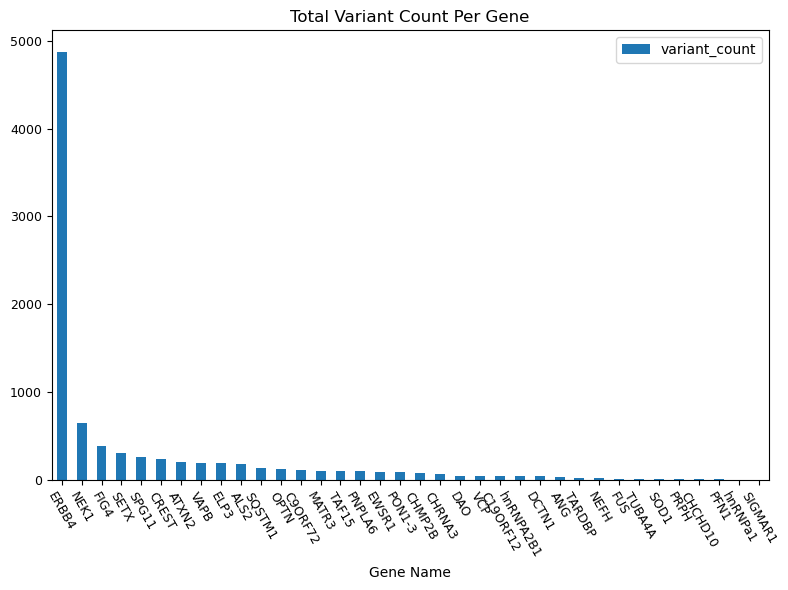

In [49]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [50]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'SETX', 'SPG11']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [51]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [52]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [53]:
hdf.reset_index(inplace=True)

In [54]:
hdf.head()

,index,count
0,HG00231,1281
1,HG00129,1550
2,HG00251,982
3,HG00118,1210
4,HG00134,1207


In [55]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(1269.4791666666667), 248.5789921752785)

## Find top and bottom genomes using mean & STD

In [56]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [57]:
len(top_genomes)

16

In [58]:
len(bottom_genomes)

17

In [59]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [60]:
sdf.head()

,HG00231,HG00129,HG00251,HG00118,HG00134,HG00100,HG00097,HG00128,HG02215,HG00146,...,HG00102,HG00154,HG00258,HG00106,HG00112,HG00265,HG00151,HG00237,HG00127,HG00145
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,17,5,4,34,19,4,8,21,1,2,...,32,3,8,33,4,4,5,36,19,36
ANG,0,0,4,0,9,2,8,5,0,11,...,5,11,5,9,3,0,11,0,5,5
ATXN2,12,15,10,15,9,7,8,9,9,7,...,11,18,9,6,15,8,12,17,14,12
C19ORF12,10,8,8,8,7,9,8,11,9,5,...,20,8,10,10,9,7,8,20,8,8
C9ORF72,34,35,10,45,22,22,10,14,4,28,...,35,29,25,40,10,23,34,35,11,23


In [61]:
tgdf= sdf.loc[top_genes]

In [62]:
tgdf_top_genomes = tgdf[top_genomes]

In [63]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [64]:
tgdf_top_genomes.head()

,HG00129,HG00097,HG02215,HG00157,HG00254,HG00259,HG00140,HG00141,HG00110,HG01334,HG00107,HG00131,HG00125,HG00101,HG01790,HG00237
gene,,,,,,,,,,,,,,,,
ERBB4,918,1276,1277,1152,1144,1111,971,921,1429,1181,1235,975,967,1069,1032,1058
NEK1,320,39,11,46,185,211,226,215,11,50,191,214,190,51,213,194
FIG4,30,27,38,32,8,37,35,56,37,26,22,29,57,37,34,59
SETX,44,23,23,49,8,48,10,8,8,12,54,24,48,15,9,20
SPG11,5,7,7,5,9,9,12,6,7,5,5,6,6,4,5,6


In [65]:
tgdf_bot_genomes.head()

,HG00251,HG00128,HG00256,HG00120,HG00135,HG00150,HG00158,HG00117,HG00133,HG00105,HG00138,HG00245,HG00137,HG00234,HG00261,HG00132,HG00258
gene,,,,,,,,,,,,,,,,,
ERBB4,649,572,489,583,434,497,564,410,525,362,684,625,615,424,599,491,629
NEK1,42,11,13,26,8,11,44,43,46,8,11,6,10,7,13,194,9
FIG4,36,61,57,26,23,58,24,65,3,5,43,43,34,55,50,52,38
SETX,10,7,18,19,6,6,9,8,50,7,48,51,8,6,7,7,6
SPG11,8,6,5,8,11,6,5,8,5,7,7,3,4,3,5,7,5


## Plot stacked bar chart for top genes & top genomes

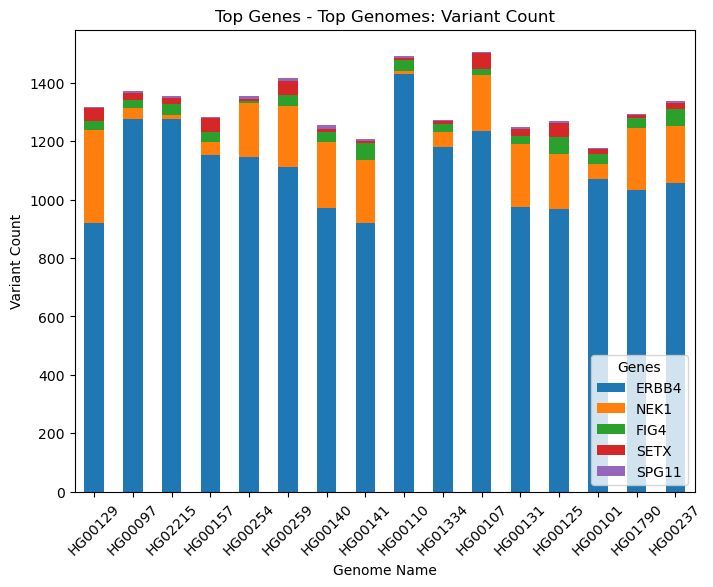

In [66]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

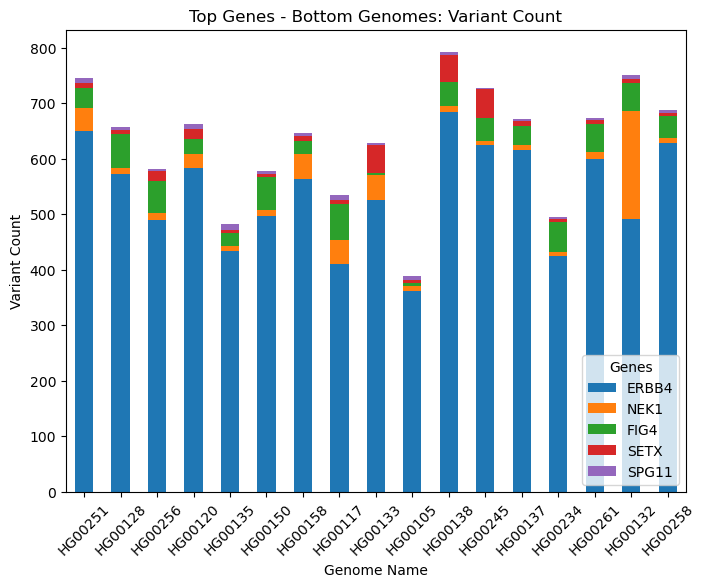

In [67]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()